Data Extraction

In [ ]:
import zipfile
import os

# Paths for the uploaded zip files
zip_path_1 = '/content/archive (2).zip'
zip_path_2 = '/content/archive (3).zip'
extract_path_1 = '/content/archive_2/'
extract_path_2 = '/content/archive_3/'

# Extracting both zip files
with zipfile.ZipFile(zip_path_1, 'r') as zip_ref:
    zip_ref.extractall(extract_path_1)

with zipfile.ZipFile(zip_path_2, 'r') as zip_ref:
    zip_ref.extractall(extract_path_2)

# List the contents of the extracted directories
extracted_files_1 = os.listdir(extract_path_1)
extracted_files_2 = os.listdir(extract_path_2)

extracted_files_1, extracted_files_2


(['Images', 'Masks'], ['flood.csv'])

Extracting floods.csv

In [ ]:
import pandas as pd

# Load the flood.csv file to inspect its contents
csv_file_path = os.path.join(extract_path_2, 'flood.csv')
flood_data = pd.read_csv(csv_file_path)

# Display the first few rows of the CSV file
flood_data.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


Extracting images data

In [ ]:
# List a few files from Images and Masks directories to understand their structure
images_path = os.path.join(extract_path_1, 'Images')
masks_path = os.path.join(extract_path_1, 'Masks')

image_files = os.listdir(images_path)[:5]  # Listing first 5 image files
mask_files = os.listdir(masks_path)[:5]    # Listing first 5 mask files

image_files, mask_files


(['Images'], ['Masks'])

In [ ]:
# Exploring deeper within the Images and Masks directories to find actual files
image_subfolder = os.path.join(images_path, 'Images')  # assuming there is another subfolder based on the output
mask_subfolder = os.path.join(masks_path, 'Masks')

# Listing files inside the subfolders
image_files_final = os.listdir(image_subfolder)[:5]
mask_files_final = os.listdir(mask_subfolder)[:5]

image_files_final, mask_files_final


(['water_body_4.jpg',
  'water_body_1847.jpg',
  'water_body_7561.jpg',
  'water_body_7444.jpg',
  'water_body_2513.jpg'],
 ['water_body_4.jpg',
  'water_body_1847.jpg',
  'water_body_7561.jpg',
  'water_body_7444.jpg',
  'water_body_2513.jpg'])

Exploratory Data Analysis (EDA)

csv file

In [ ]:
# Basic summary statistics for the flood.csv dataset
flood_data_summary = flood_data.describe()

# Checking for missing values in the dataset
missing_values = flood_data.isnull().sum()

# Correlation matrix to see the relationships between features and the target variable (FloodProbability)
correlation_matrix = flood_data.corr()

# Display summary statistics, missing values, and correlation matrix
flood_data_summary, missing_values, correlation_matrix["FloodProbability"].sort_values(ascending=False)


(       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
 count      50000.000000        50000.000000      50000.00000   50000.000000   
 mean           4.991480            4.984100          5.01594       5.008480   
 std            2.236834            2.246488          2.23131       2.222743   
 min            0.000000            0.000000          0.00000       0.000000   
 25%            3.000000            3.000000          3.00000       3.000000   
 50%            5.000000            5.000000          5.00000       5.000000   
 75%            6.000000            6.000000          6.00000       6.000000   
 max           16.000000           18.000000         16.00000      17.000000   
 
        Urbanization  ClimateChange  DamsQuality     Siltation  \
 count  50000.000000   50000.000000  50000.00000  50000.000000   
 mean       4.989060       4.988340      5.01536      4.988600   
 std        2.243159       2.226761      2.24500      2.232642   
 min        0.

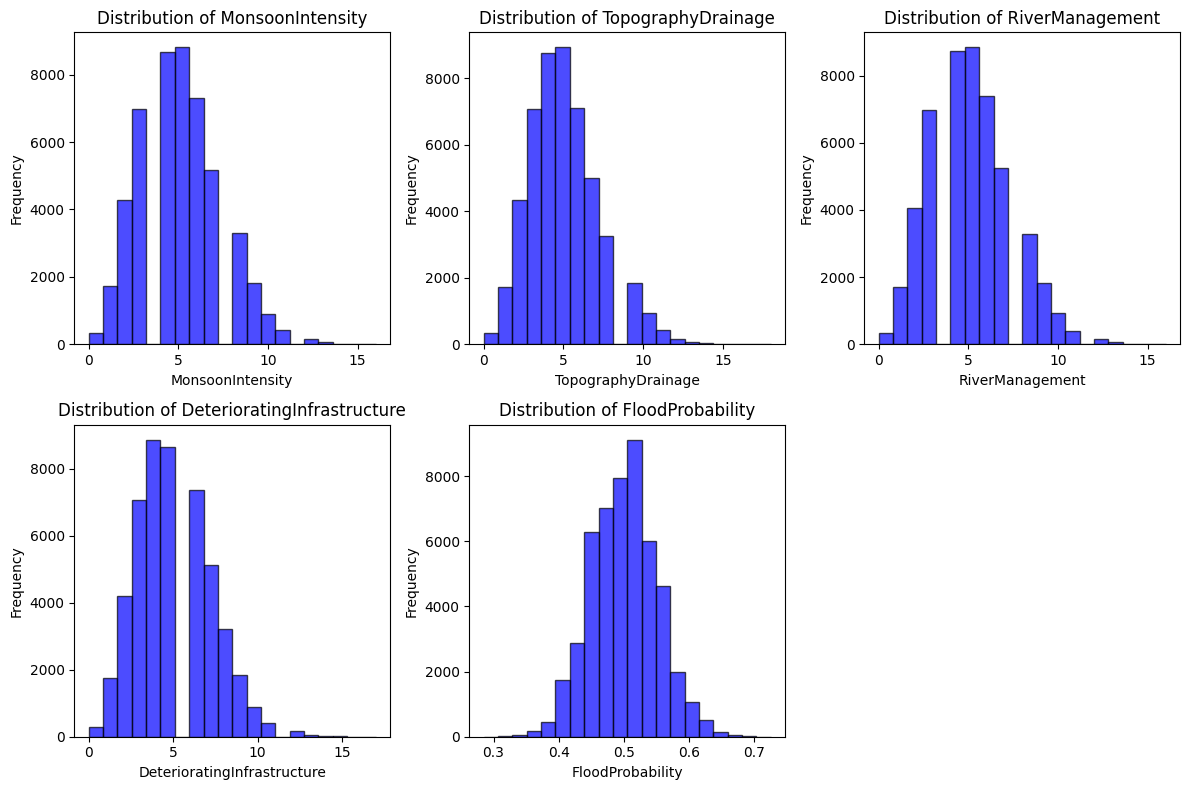

In [ ]:
import matplotlib.pyplot as plt

# Selecting a few key features to visualize their distributions
features_to_plot = ["MonsoonIntensity", "TopographyDrainage", "RiverManagement",
                    "DeterioratingInfrastructure", "FloodProbability"]

# Plotting the distributions of the selected features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.hist(flood_data[feature], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


analyzing the satellite images and masks

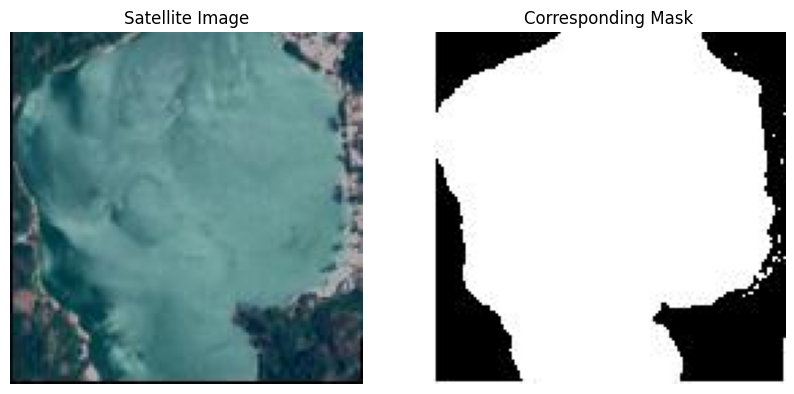

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Define paths to a few sample images and masks
sample_image_path = os.path.join(image_subfolder, image_files_final[0])
sample_mask_path = os.path.join(mask_subfolder, mask_files_final[0])

# Load the image and mask
sample_image = Image.open(sample_image_path)
sample_mask = Image.open(sample_mask_path)

# Display the image and mask side by side for comparison
plt.figure(figsize=(10, 5))

# Plot the satellite image
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title('Satellite Image')
plt.axis('off')

# Plot the corresponding mask
plt.subplot(1, 2, 2)
plt.imshow(sample_mask, cmap='gray')
plt.title('Corresponding Mask')
plt.axis('off')

plt.show()


In [ ]:
# Checking the consistency of size and dimensions for a few image-mask pairs

image_sizes = []
mask_sizes = []

# Checking sizes for first 5 image-mask pairs
for img_file, mask_file in zip(image_files_final[:5], mask_files_final[:5]):
    img_path = os.path.join(image_subfolder, img_file)
    mask_path = os.path.join(mask_subfolder, mask_file)

    # Open the images and masks
    img = Image.open(img_path)
    mask = Image.open(mask_path)

    # Store their sizes (width, height)
    image_sizes.append(img.size)
    mask_sizes.append(mask.size)

image_sizes, mask_sizes


([(130, 130), (185, 293), (686, 692), (991, 1083), (452, 587)],
 [(130, 130), (185, 293), (686, 692), (991, 1083), (452, 587)])

Resizing images and masks

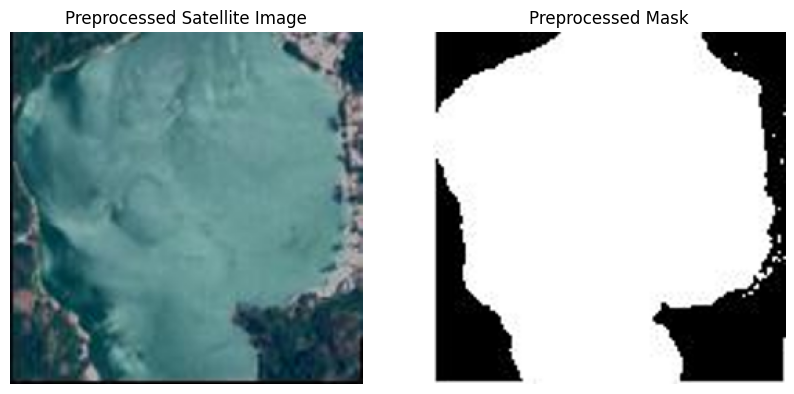

In [ ]:
# Preprocessing: Resize images and masks to a common size (e.g., 256x256) and normalize pixel values
import numpy as np

# Define target size for resizing
target_size = (256, 256)

# Helper function to resize and normalize images and masks
def preprocess_image_mask(image_path, mask_path, target_size):
    # Open image and mask
    image = Image.open(image_path)
    mask = Image.open(mask_path)

    # Resize image and mask
    image_resized = image.resize(target_size)
    mask_resized = mask.resize(target_size)

    # Normalize image (convert pixel values to range [0, 1])
    image_resized = np.array(image_resized) / 255.0
    mask_resized = np.array(mask_resized) / 255.0  # Normalizing mask as well (though it's usually binary)

    return image_resized, mask_resized

# Preprocessing first 5 images and masks as a sample
preprocessed_images = []
preprocessed_masks = []

for img_file, mask_file in zip(image_files_final[:5], mask_files_final[:5]):
    img_path = os.path.join(image_subfolder, img_file)
    mask_path = os.path.join(mask_subfolder, mask_file)

    # Preprocess the image and mask
    img_resized, mask_resized = preprocess_image_mask(img_path, mask_path, target_size)

    preprocessed_images.append(img_resized)
    preprocessed_masks.append(mask_resized)

# Display one preprocessed image and mask for confirmation
plt.figure(figsize=(10, 5))

# Plot the preprocessed satellite image
plt.subplot(1, 2, 1)
plt.imshow(preprocessed_images[0])
plt.title('Preprocessed Satellite Image')
plt.axis('off')

# Plot the preprocessed corresponding mask
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_masks[0], cmap='gray')
plt.title('Preprocessed Mask')
plt.axis('off')

plt.show()


Batch Preprocessing : Resizing all the images

In [ ]:
# Preprocess all images and masks by resizing and normalizing

# Initialize lists to store preprocessed images and masks
preprocessed_images_all = []
preprocessed_masks_all = []

# Loop through all images and masks in the dataset
for img_file, mask_file in zip(image_files_final, mask_files_final):
    img_path = os.path.join(image_subfolder, img_file)
    mask_path = os.path.join(mask_subfolder, mask_file)

    # Preprocess the image and mask
    img_resized, mask_resized = preprocess_image_mask(img_path, mask_path, target_size)

    preprocessed_images_all.append(img_resized)
    preprocessed_masks_all.append(mask_resized)

# Converting lists to numpy arrays for model training
preprocessed_images_all = np.array(preprocessed_images_all)
preprocessed_masks_all = np.array(preprocessed_masks_all)

# Confirm the shape of preprocessed data
preprocessed_images_all.shape, preprocessed_masks_all.shape


((5, 256, 256, 3), (5, 256, 256, 3))

Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(preprocessed_images_all, preprocessed_masks_all, test_size=0.2, random_state=42)

# Confirm the shapes of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((4, 256, 256, 3), (1, 256, 256, 3), (4, 256, 256, 3), (1, 256, 256, 3))

Designing the CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Designing a simple CNN for image segmentation
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Up-sampling Layer 1
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

    # Up-sampling Layer 2
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

    # Output layer (1 channel for binary mask prediction)
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model based on input shape of the preprocessed images
input_shape = (256, 256, 3)
cnn_model = create_cnn_model(input_shape)

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 1)         │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,537 (724.75 KB)

 Trainable params: 185,537 (724.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Reshape the masks to have a single channel (grayscale)
y_train = np.expand_dims(y_train[:, :, :, 0], axis=-1)
y_val = np.expand_dims(y_val[:, :, :, 0], axis=-1)




Updated CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Designing a CNN with Transpose Convolution for accurate upsampling
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Encoder (Downsampling)
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Decoder (Upsampling using Conv2DTranspose)
    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # Output layer (1 channel for binary mask prediction)
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model based on input shape of the preprocessed images
input_shape = (256, 256, 3)
cnn_model = create_cnn_model(input_shape)

# Display the model summary
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 256, 256, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 256, 256, 1)         │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,121 (1.27 MB)

 Trainable params: 333,121 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the CNN model
history = cnn_model.fit(X_train, y_train,
                        epochs=5,
                        batch_size=8,
                        validation_data=(X_val, y_val))


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2730 - loss: 0.6940 - val_accuracy: 0.6122 - val_loss: 0.6918
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4921 - loss: 0.6926 - val_accuracy: 0.6856 - val_loss: 0.6898
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5124 - loss: 0.6919 - val_accuracy: 0.6856 - val_loss: 0.6874
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5125 - loss: 0.6910 - val_accuracy: 0.6856 - val_loss: 0.6833
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5125 - loss: 0.6896 - val_accuracy: 0.6856 - val_loss: 0.6760


In [ ]:
# Print the size of training and validation sets
print(f'Training set size: {X_train.shape[0]} images')
print(f'Validation set size: {X_val.shape[0]} images')

Training set size: 4 images
Validation set size: 1 images


In [ ]:
# Checking the total number of image and mask files in the directories
num_images = len(os.listdir(image_subfolder))
num_masks = len(os.listdir(mask_subfolder))

print(f"Total number of images: {num_images}")
print(f"Total number of masks: {num_masks}")


Total number of images: 2841
Total number of masks: 2841


In [ ]:
import numpy as np
from tensorflow.keras.utils import Sequence
from PIL import Image
import os

class ImageMaskDataGenerator(Sequence):
    def __init__(self, image_files, mask_files, image_dir, mask_dir, batch_size, target_size):
        self.image_files = image_files
        self.mask_files = mask_files
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.batch_size = batch_size
        self.target_size = target_size

    def __len__(self):
        return int(np.ceil(len(self.image_files) / self.batch_size))

    def __getitem__(self, idx):
        batch_image_files = self.image_files[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_mask_files = self.mask_files[idx * self.batch_size:(idx + 1) * self.batch_size]

        images = []
        masks = []

        for img_file, mask_file in zip(batch_image_files, batch_mask_files):
            img_path = os.path.join(self.image_dir, img_file)
            mask_path = os.path.join(self.mask_dir, mask_file)

            # Load and preprocess image and mask
            image = Image.open(img_path).resize(self.target_size)
            mask = Image.open(mask_path).resize(self.target_size)

            image = np.array(image) / 255.0
            mask = np.array(mask) / 255.0
            mask = np.expand_dims(mask[:, :, 0], axis=-1)  # Ensure mask has one channel

            images.append(image)
            masks.append(mask)

        return np.array(images), np.array(masks)

# Define paths, batch size, and target size
image_subfolder = '/content/archive_2/Images/Images'
mask_subfolder = '/content/archive_2/Masks/Masks'
batch_size = 16
target_size = (256, 256)

# Get the list of image and mask files
image_files = os.listdir(image_subfolder)
mask_files = os.listdir(mask_subfolder)

# Create the data generator for training
train_generator = ImageMaskDataGenerator(image_files, mask_files, image_subfolder, mask_subfolder, batch_size, target_size)

# Get total number of batches
print(f"Total batches: {len(train_generator)}")


Total batches: 178


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Redefine the CNN model with Conv2DTranspose layers
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Encoder (Downsampling)
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Decoder (Upsampling using Conv2DTranspose)
    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # Output layer (1 channel for binary mask prediction)
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model based on input shape of the preprocessed images
input_shape = (256, 256, 3)
cnn_model = create_cnn_model(input_shape)

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 256, 256, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 1)         │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,121 (1.27 MB)

 Trainable params: 333,121 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using the data generator
history = cnn_model.fit(train_generator,
                        epochs=5,  # You can increase the epochs if needed
                        steps_per_epoch=len(train_generator))  # steps_per_epoch should be equal to the number of batches


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 909s 5s/step - accuracy: 0.6048 - loss: 0.5752
Epoch 2/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 898s 5s/step - accuracy: 0.6693 - loss: 0.5030
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 89us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 914s 5s/step - accuracy: 0.6960 - loss: 0.4427


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


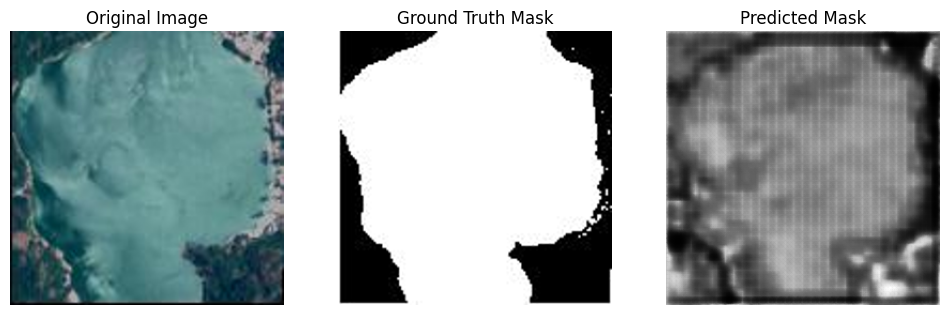

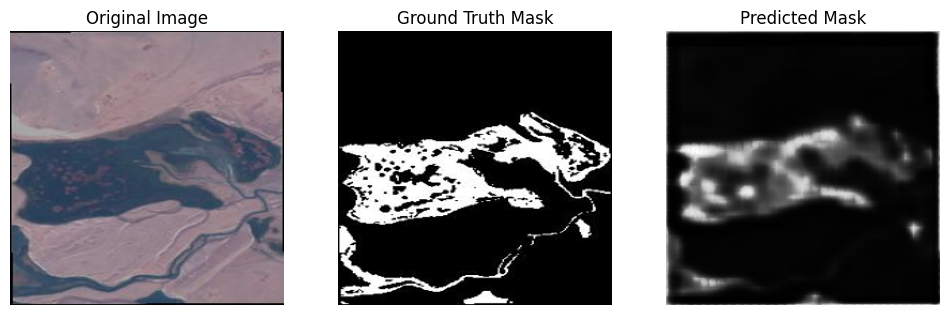

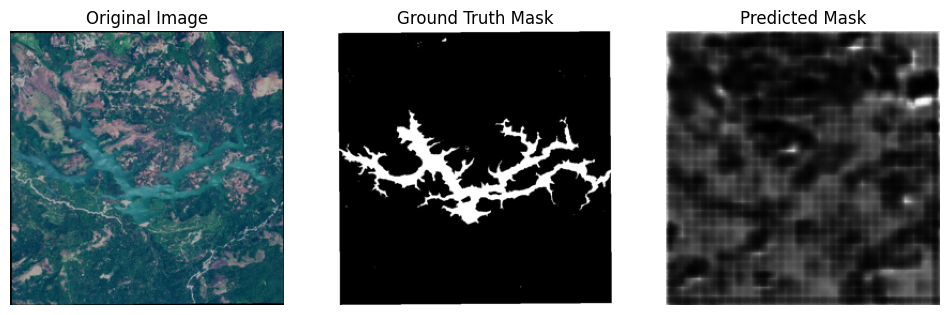

In [ ]:
# Get the first batch of validation data from the generator
X_val_batch, y_val_batch = train_generator.__getitem__(0)  # Fetch the first batch (index 0)

# Making predictions on the validation batch
predictions = cnn_model.predict(X_val_batch)

# Display a few prediction results
import matplotlib.pyplot as plt

# Show original image, ground truth mask, and predicted mask side by side
for i in range(3):  # Display 3 random predictions
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(X_val_batch[i])
    plt.title('Original Image')
    plt.axis('off')

    # Ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(np.squeeze(y_val_batch[i]), cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(np.squeeze(predictions[i]), cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()


Now focusing on floods.csv file

In [ ]:
import pandas as pd

# Load the flood.csv data
csv_file_path = '/content/archive_3/flood.csv'
flood_data = pd.read_csv(csv_file_path)

# Display basic information about the data
flood_data.info()

# Show the first few rows of the dataset
flood_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
# Summary statistics of the dataset
flood_data.describe()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


Correlation analysis

In [ ]:
# Correlation matrix
correlation_matrix = flood_data.corr()

# Display the correlation of features with FloodProbability
correlation_with_flood_probability = correlation_matrix["FloodProbability"].sort_values(ascending=False)
print(correlation_with_flood_probability)


FloodProbability                   1.000000
DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221846
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Name: FloodProbability, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = flood_data.drop(columns=["FloodProbability"])
y = flood_data["FloodProbability"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(X_train.shape, X_test.shape)


(40000, 20) (10000, 20)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0006737141275000004


Model Interpretation

Feature Importance Analysis

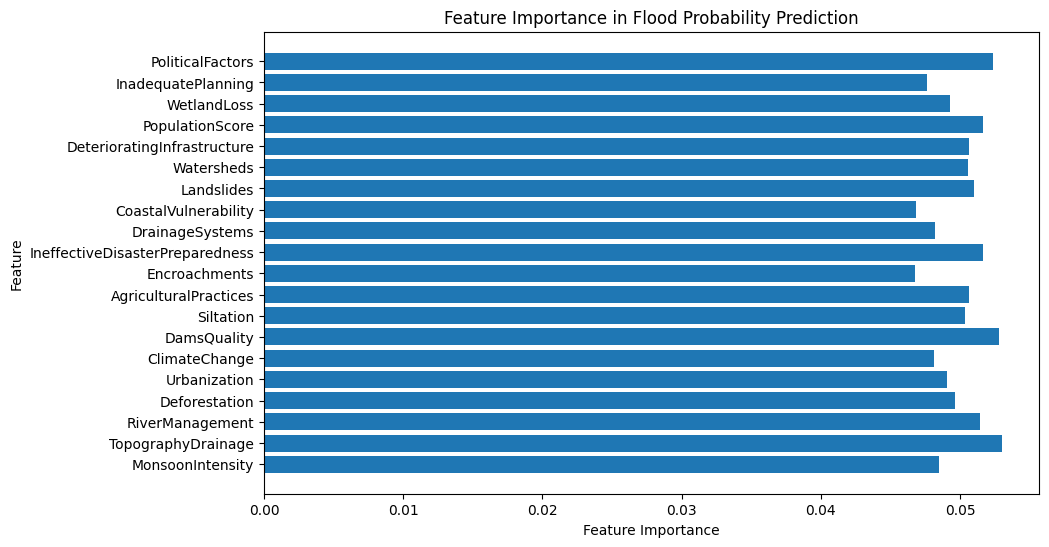

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
importance = rf_model.feature_importances_

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Flood Probability Prediction')
plt.show()


Saving the Models

In [ ]:
# Saving the Random Forest model
import joblib
joblib.dump(rf_model, 'random_forest_flood_model.pkl')

# Saving the CNN model
cnn_model.save('flood_segmentation_cnn_model.h5')
